# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification.
We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits).
The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist)
and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Hoeth

Student name: Max
    
ID: 2055977

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pprintpp import pprint as pp
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
import os
import gzip


# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels


In [3]:
import time


#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
#ID = place a random seed
np.random.seed(int(time.time()))

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [65 65 46 64 66 57 55 61 66 55]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


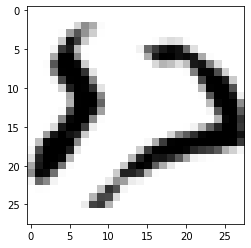

LABEL: 5
INPUT:


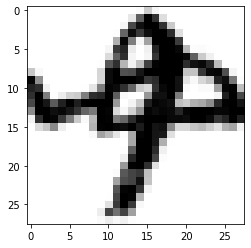

LABEL: 7
INPUT:


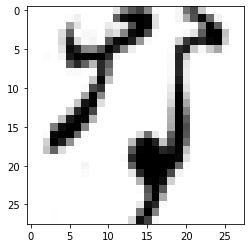

LABEL: 4
INPUT:


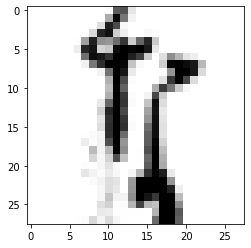

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use an SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation.
Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


m = SVC()
parameters = {'kernel':('linear')}
svm = GridSearchCV(m, {'kernel':['linear']}, cv = 4, n_jobs=-1).fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp(svm.cv_results_)

RESULTS FOR LINEAR KERNEL
0 0
8 2
9 9
0 0
6 2
5 5
4 2
1 1
3 5
2 2
0 0
1 4
7 3
8 8
5 5
5 4
5 1
6 6
8 8
0 8
Best parameters set found:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.76
All scores on the grid:
{
    'mean_fit_time': array([0.05212986]),
    'mean_score_time': array([0.01173729]),
    'mean_test_score': array([0.73]),
    'param_kernel': masked_array(data=['linear'],
                 mask=[False],
           fill_value='?',
                dtype=object),
    'params': [{'kernel': 'linear'}],
    'rank_test_score': array([1], dtype=int32),
    'split0_test_score': array([0.71333333]),
    'split1_test_score': array([0.72]),
    'split2_test_score': array([0.73333333]),
    'split3_test_score': array([

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
m = SVC(kernel='linear', degree=2)
svm = GridSearchCV(m, parameters ,n_jobs=-1, cv=4).fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp((svm.cv_results_))

RESULTS FOR POLY DEGREE=2 KERNEL
0 0
8 1
9 9
0 0
6 2
5 5
4 1
1 1
3 5
2 2
0 0
1 1
7 3
8 8
5 5
5 5
5 1
6 6
8 8
0 8
Best parameters set found:
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.76475
All scores on the grid:
{
    'mean_fit_time': array([0.06825876, 0.06193376, 0.05498385, 0.06249171, 0.06112391,
           0.06195128, 0.06231266, 0.07136601, 0.07617533]),
    'mean_score_time': array([0.01307249, 0.01141447, 0.01720393, 0.01228249, 0.01279706,
           0.01639372, 0.01852053, 0.01565915, 0.01424092]),
    'mean_test_score': array([0.75333333, 0.75333333, 0.75333333, 0.73      , 0.73      ,
           0.73      , 0.73      , 0.73      , 0.73      ]),
    'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
m = SVC(kernel='linear', degree=3)
svm = GridSearchCV(m, parameters ,n_jobs=-1, cv=4).fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=3 KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp((svm.cv_results_))

RESULTS FOR POLY DEGREE=3 KERNEL
0 0
8 1
9 9
0 0
6 2
5 5
4 1
1 1
3 5
2 2
0 0
1 1
7 3
8 8
5 5
5 5
5 1
6 6
8 8
0 8
Best parameters set found:
{'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.76475
All scores on the grid:
{
    'mean_fit_time': array([0.07796955, 0.08259112, 0.06376195, 0.06208414, 0.06443024,
           0.0636692 , 0.06401348, 0.06696689, 0.04695117]),
    'mean_score_time': array([0.01250768, 0.01515007, 0.01579177, 0.01531041, 0.01248974,
           0.01387906, 0.01522404, 0.01505315, 0.00946534]),
    'mean_test_score': array([0.75333333, 0.75333333, 0.75333333, 0.73      , 0.73      ,
           0.73      , 0.73      , 0.73      , 0.73      ]),
    'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with poly of degree 2 kernel
m = SVC(kernel='rbf')
svm = GridSearchCV(m, parameters ,n_jobs=-1, cv=4).fit(X_train, y_train)

print ('RESULTS FOR RFB KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp((svm.cv_results_))

RESULTS FOR RFB KERNEL
0 0
8 8
9 9
0 0
6 2
5 5
4 1
1 1
3 3
2 2
0 0
1 1
7 3
8 8
5 5
5 4
5 1
6 6
8 8
0 8
Best parameters set found:
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.82425
All scores on the grid:
{
    'mean_fit_time': array([0.10234588, 0.10933346, 0.13876331, 0.12123668, 0.10725999,
           0.12160891, 0.12684464, 0.13199461, 0.07550794, 0.12209153,
           0.12109017, 0.1456911 , 0.08348322, 0.10598832, 0.10815376,
           0.1016506 ]),
    'mean_score_time': array([0.03669715, 0.04295552, 0.04147977, 0.03604108, 0.04575825,
           0.03689802, 0.03087765, 0.04288036, 0.03602278, 0.04132545,
           0.04566848, 0.04465365, 0.02578944, 0.02998918, 0.02707601,
           0.02550894]),
    'mea

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_params = {'C':[10], 'gamma':[0.01]}

best_ = SVC(kernel='rbf')
best_SVM = GridSearchCV(best_, best_params ,n_jobs=-1, cv=4).fit(X_train, y_train)

# (error is 1 - svm.score)

training_error = 1 - best_SVM.best_estimator_.score(X_train, y_train)
test_error = 1- best_SVM.best_estimator_.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.175750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel)
impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


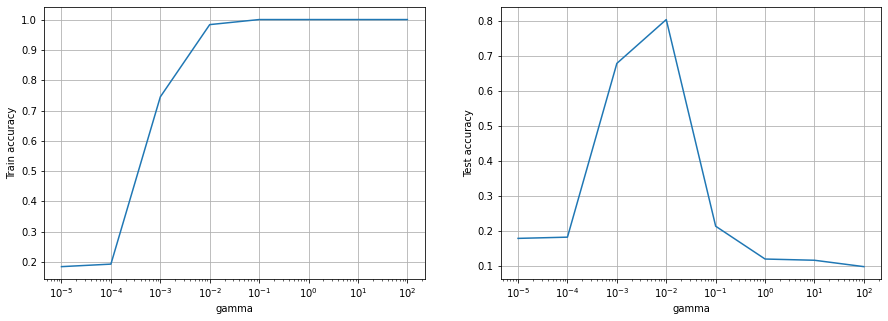

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for i in gamma_values:
    parameters = {'C':[1], 'gamma':[i]}
    m = SVC(kernel='rbf')
    svm = GridSearchCV(m, parameters, n_jobs=-1, cv=4).fit(X_train, y_train)

    train_acc_list.append(svm.best_estimator_.score(X_train, y_train))
    test_acc_list.append(svm.best_estimator_.score(X_test, y_test))


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X, y = load_mnist('data', kind='train')
X, y = X / 255., y

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]


labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [210 205 187 190 214 198 210 202 184 200]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long
time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do
this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

parameters = {'C':[10], 'gamma':[0.01]}
m = SVC(kernel='rbf')
svm = GridSearchCV(m, parameters, n_jobs=-1, cv=4).fit(X_train, y_train)

training_error = 1 - svm.best_estimator_.score(X_train, y_train)
test_error = 1- svm.best_estimator_.score(X_test, y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

# for 20000, Best SVM training error: 0.000050, Best SVM test error: 0.046850

Best SVM training error: 0.000000
Best SVM test error: 0.115052


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large, large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=10**64).fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1- logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.282103


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegressionCV(Cs=1, n_jobs=-1).fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1- logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.392000
Best logistic regression test error: 0.433828


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM,
include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [19]:
LR_prediction = linear_model.LogisticRegression(C=10**64).fit(X_train, y_train)
lr_xy = LR_prediction.predict(X_test)

In [20]:
m = SVC(kernel='rbf')
SVM_prediction = GridSearchCV(m, parameters, n_jobs=-1, cv=4).fit(X_train, y_train)
svm_xy = SVM_prediction.predict(X_test)

In [21]:
miss = np.array([])
for lr,svm,y in zip(lr_xy, svm_xy, y_test):
    if y != lr & y == svm:
        miss = np.append(miss, int(y))

Text(0, 0.5, 'Number misclassified')

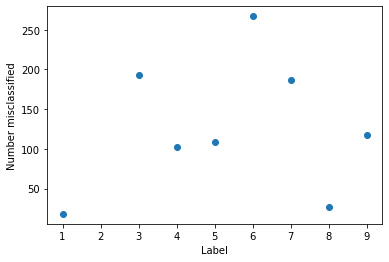

In [22]:
miss = pd.DataFrame(miss).astype(int)
val = miss.value_counts().sort_index()
labels = [i[0] for i in val.index]

plt.scatter(labels, val.values)
plt.xlabel('Label')
plt.ylabel('Number misclassified')

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output
label. Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on
each single class.


In [23]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, svm_xy)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM/counts[:,None])

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, lr_xy)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR/counts[:,None] )

Labels and frequencies in test set:  [5790 5795 5813 5810 5786 5802 5790 5798 5816 5800]

 Confusion matrix SVM  
 
 [[5392    8    4   22  113   41    6  103   79   22]
 [  28 5043  146   46  115   12  164    5   78  158]
 [   0   88 4742   89   87   29  512   19  175   72]
 [  13   85  231 5212   59   57   17   27   87   22]
 [ 145  111  115   49 4967   14  123   42   77  143]
 [  49   93  169  143   59 5155   37   15   68   14]
 [  19  123  298   19  154    9 5047   54   47   20]
 [  46   25   51   39  101   26   77 5352   53   28]
 [  31  161  108   57   23   35  161    5 5204   31]
 [  22  150  162   12  101    8   19   63   50 5213]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.   0.02 0.01 0.   0.02 0.01 0.  ]
 [0.   0.87 0.03 0.01 0.02 0.   0.03 0.   0.01 0.03]
 [0.   0.02 0.82 0.02 0.01 0.   0.09 0.   0.03 0.01]
 [0.   0.01 0.04 0.9  0.01 0.01 0.   0.   0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.86 0.   0.02 0.01 0.01 0.02]
 [0.01 0.02 0.03 0.02 0.01 0.89 0.01 0.   0.0

In [24]:
confusion_SVM = confusion_SVM/confusion_SVM.max() # ...confusion_matrix(y_test, svm_xy, normalize='true')
confusion_LR = confusion_LR/confusion_LR.max()
print('Normalized Confusion Matrix SVM \n' )
print(confusion_SVM,'\n')
print('Normalized Confusion Matrix LR \n' )
print(confusion_LR)

Normalized Confusion Matrix SVM 

[[1.   0.   0.   0.   0.02 0.01 0.   0.02 0.01 0.  ]
 [0.01 0.94 0.03 0.01 0.02 0.   0.03 0.   0.01 0.03]
 [0.   0.02 0.88 0.02 0.02 0.01 0.09 0.   0.03 0.01]
 [0.   0.02 0.04 0.97 0.01 0.01 0.   0.01 0.02 0.  ]
 [0.03 0.02 0.02 0.01 0.92 0.   0.02 0.01 0.01 0.03]
 [0.01 0.02 0.03 0.03 0.01 0.96 0.01 0.   0.01 0.  ]
 [0.   0.02 0.06 0.   0.03 0.   0.94 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.02 0.   0.01 0.99 0.01 0.01]
 [0.01 0.03 0.02 0.01 0.   0.01 0.03 0.   0.97 0.01]
 [0.   0.03 0.03 0.   0.02 0.   0.   0.01 0.01 0.97]] 

Normalized Confusion Matrix LR 

[[1.   0.   0.01 0.01 0.05 0.05 0.01 0.04 0.03 0.03]
 [0.01 0.83 0.09 0.02 0.05 0.01 0.07 0.01 0.03 0.1 ]
 [0.   0.06 0.71 0.03 0.05 0.03 0.17 0.03 0.08 0.06]
 [0.01 0.03 0.05 0.93 0.02 0.07 0.01 0.02 0.06 0.02]
 [0.04 0.06 0.05 0.04 0.79 0.01 0.06 0.04 0.02 0.11]
 [0.02 0.03 0.06 0.06 0.01 0.93 0.03 0.03 0.03 0.01]
 [0.01 0.07 0.1  0.02 0.05 0.03 0.85 0.03 0.04 0.03]
 [0.04 0.01 0.02 0.03 0.04 0.

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and
others a higher one ? Make some guesses on the possible causes.
